# Entropy of a Large Language Model output
*Nikkin Dev*

Importing libraries

In [2]:
from pprint import pprint
import json
import math
import matplotlib.pyplot as plt
from openai import OpenAI
import numpy as np

client = OpenAI()

Set the seed and chat completion

In [3]:
seed = 137

In [42]:
completion = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {"role": "user", "content": "The protagonist went around the corner and "}
    ],
    seed=seed,
    temperature=0,
    logprobs=True, # Gives the log probs of the chosen token
    top_logprobs=5, # Number of top options for tokens along with lobprob values
    max_tokens=3
)

In [43]:
print(completion.choices[0].message.content)

found themselves in


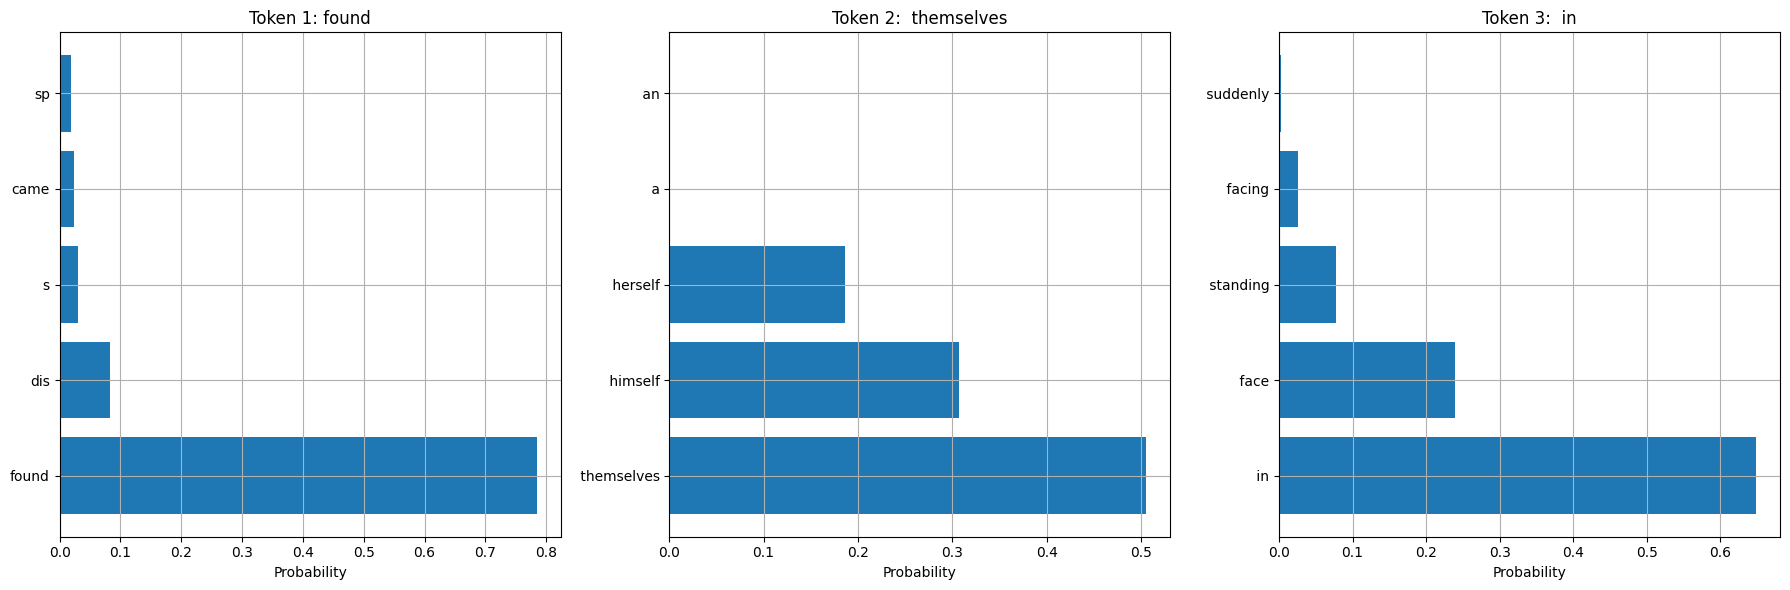

In [44]:
fig, axes = plt.subplots(1, len(completion.choices[0].logprobs.content), figsize=(18, 6)) 

for i, (token_logprobs, ax) in enumerate(zip(
    completion.choices[0].logprobs.content,
    axes
)):
    ax.barh(
        [item.token for item in token_logprobs.top_logprobs],
        [math.exp(item.logprob) for item in token_logprobs.top_logprobs]
    )
    ax.set_xlabel('Probability')
    ax.set_title(f'Token {i+1}: {token_logprobs.token}')
                  
    probabilities = [math.exp(item.logprob) for item in token_logprobs.top_logprobs]
    ax.grid(True)

plt.tight_layout()
plt.show()

In [50]:
completion = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {"role": "user", "content": "write a haiku about ai"}
    ],
    seed=seed,
    temperature=0,
    logprobs=True, # Gives the log probs of the chosen token
    top_logprobs=20, # Number of top options for tokens along with lobprob values
)

print(completion.choices[0].message.content)

entropies = []
tokens = []

for i, token_logprobs in enumerate(completion.choices[0].logprobs.content):
    probabilities = [math.exp(item.logprob) for item in token_logprobs.top_logprobs]
    probabilities_sum = sum(probabilities)
    normalized_probabilities = [p/probabilities_sum for p in probabilities]
    entropy = -sum(p * math.log2(p) for p in normalized_probabilities)
    entropies.append(entropy)
    tokens.append(token_logprobs.token)

    # print(f"Token {i} Text {token_logprobs.token} \tEntropy {entropy:.3f}")

Silent circuits hum,  
Wisdom in electric streams—  
Thoughts without a face.


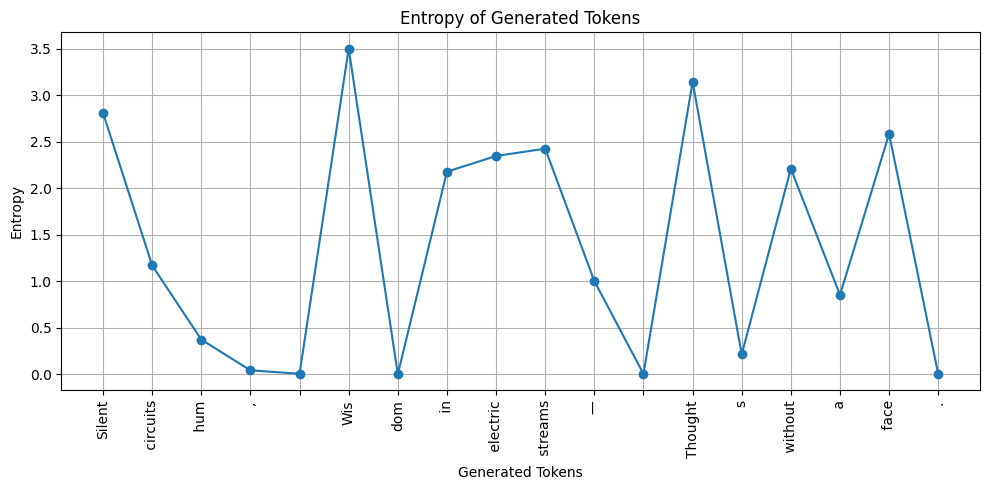

In [51]:
plt.figure(figsize=(10, 5))
plt.plot(entropies, marker='o', linestyle='-')
plt.xticks(ticks=range(len(tokens)), labels=tokens, rotation=90)  # Use tokens as labels
plt.xlabel("Generated Tokens")
plt.ylabel("Entropy")
plt.title("Entropy of Generated Tokens")
plt.grid(True)
plt.tight_layout()  # Adjust layout to fit long labels
plt.show()

In [74]:
completion2 = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {"role": "user", "content": "Write me an essay about Claude Shannon"}
    ],
    seed=seed,
    temperature=0,
    logprobs=True,
    top_logprobs=20,
    max_tokens=300
)

In [75]:
print(completion2.choices[0].message.content)

Claude Shannon, often referred to as the "father of modern digital communication and information theory," was a pioneering American mathematician and electrical engineer whose work laid the foundation for the digital age. Born on April 30, 1916, in Petoskey, Michigan, Shannon's intellectual curiosity and innovative thinking led to groundbreaking contributions that have profoundly influenced technology, telecommunications, and computer science.

Shannon's academic journey began at the University of Michigan, where he earned a bachelor's degree in electrical engineering and mathematics in 1936. He then pursued a master's degree at the Massachusetts Institute of Technology (MIT), where he worked on Vannevar Bush's differential analyzer, an early analog computer. It was during this time that Shannon wrote his master's thesis, "A Symbolic Analysis of Relay and Switching Circuits," which demonstrated how Boolean algebra could be applied to electrical circuits. This work, considered one of th

In [76]:
entropies = []
tokens = []

for i, token_logprobs in enumerate(completion2.choices[0].logprobs.content):
    probabilities = [math.exp(item.logprob) for item in token_logprobs.top_logprobs]
    probabilities_sum = sum(probabilities)
    normalized_probabilities = [p/probabilities_sum for p in probabilities]
    entropy = -sum(p * math.log2(p) for p in normalized_probabilities)
    entropies.append(entropy)
    tokens.append(token_logprobs.token)

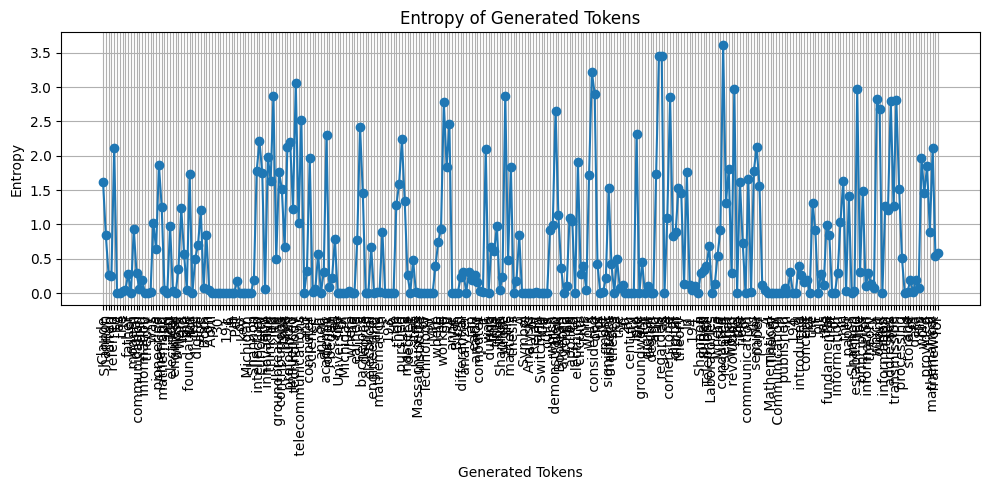

In [77]:
plt.figure(figsize=(10, 5))
plt.plot(entropies, marker='o', linestyle='-')
plt.xticks(ticks=range(len(tokens)), labels=tokens, rotation=90)  # Use tokens as labels
plt.xlabel("Generated Tokens")
plt.ylabel("Entropy")
plt.title("Entropy of Generated Tokens")
plt.grid(True)
plt.tight_layout()  # Adjust layout to fit long labels
plt.show()

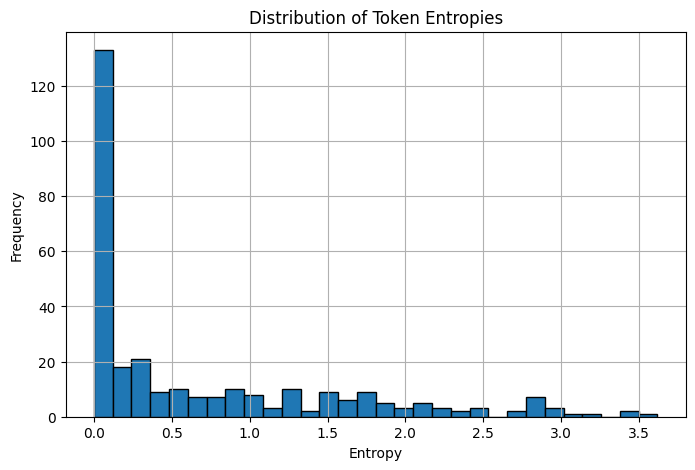

In [78]:
plt.figure(figsize=(8, 5))
plt.hist(entropies, bins=30, edgecolor='black')
plt.xlabel("Entropy")
plt.ylabel("Frequency")
plt.title("Distribution of Token Entropies")
plt.grid(True)
plt.show()

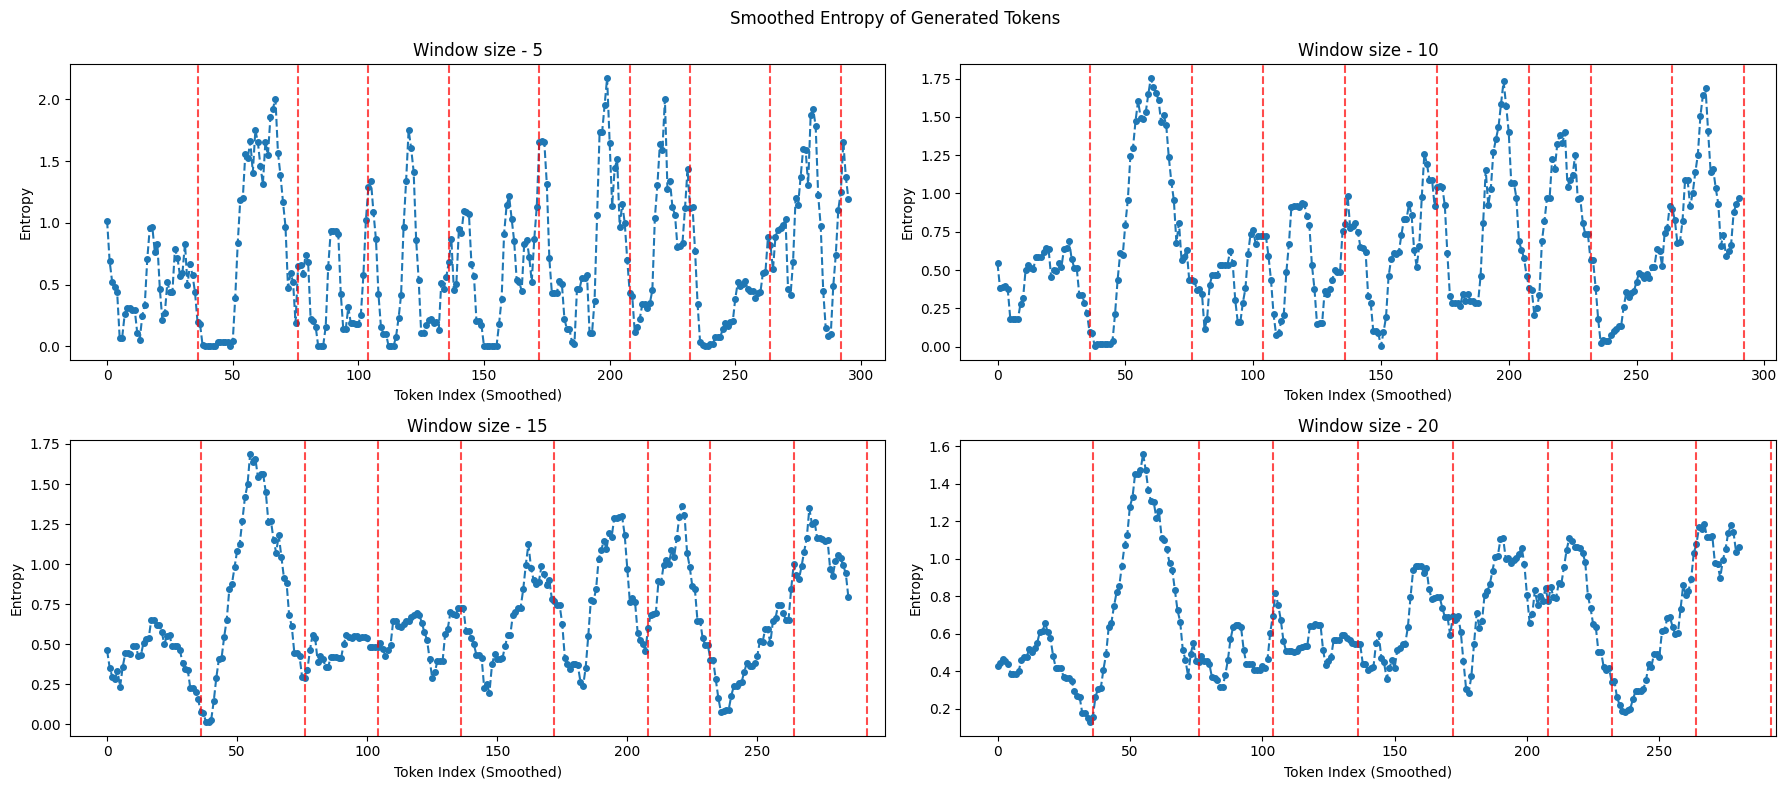

In [98]:
indices_with_dot = [i for i, token in enumerate(tokens) if '.' in token]
window_sizes = [5,10,15,20]

fig, axes = plt.subplots(2, 2, figsize=(18, 8))
for i, window_size in enumerate(window_sizes):
    smoothed_entropies = np.convolve(entropies, np.ones(window_size)/window_size, mode='valid')
    
    axes[i//2, i%2].plot(smoothed_entropies, marker='o', linestyle='--', markersize=4)
    axes[i//2, i%2].set_xlabel("Token Index (Smoothed)")
    axes[i//2, i%2].set_ylabel("Entropy")
    axes[i//2, i%2].set_title(f"Window size - {window_size}")

    for idx in indices_with_dot:
        axes[i // 2, i % 2].axvline(x=idx, color='r', linestyle='--', alpha=0.7)  # Vertical line

fig.suptitle("Smoothed Entropy of Generated Tokens")
plt.tight_layout()
plt.show()

High entropy tokens above a certain threshold

In [ ]:
zipped_sorted = sorted(zip(tokens, entropies), key=lambda x: x[1])

print("Tokens with low entropy:")
print(*[item[0] for item in zipped_sorted[:10]], sep=" | ")

print("Tokens with high entropy:")
print(*[item[0] for item in zipped_sorted[-10:]], sep=" | ")

In [138]:
# Group consecutive indices into clusters
clusters = []
current_cluster = []

high_entropy_indices = np.argsort(entropies)[-10:].tolist()

for i in range(len(high_entropy_indices)):
    if i == 0 or high_entropy_indices[i] == high_entropy_indices[i-1] + 1:
        current_cluster.append(high_entropy_indices[i])
    else:
        clusters.append(current_cluster)
        current_cluster = [high_entropy_indices[i]]

if current_cluster:
    clusters.append(current_cluster)

# Print clusters and surrounding context
print("\nHigh-Entropy Clusters and Context:")
window = 3  # Tokens to show before and after the cluster

for cluster in clusters:
    start = max(0, cluster[0] - window)
    end = min(len(tokens), cluster[-1] + window + 1)
    context = tokens[start:end]

    print(f"Cluster: {cluster}")

    # Highlight tokens in the cluster
    highlighted_context = []
    for i in range(start, end):
        if i in cluster:
            # Highlight the cluster token with brackets or ANSI escape codes
            highlighted_context.append(f"\033[91m{tokens[i]}\033[0m")  # Red color
        else:
            highlighted_context.append(tokens[i])

    # Print the context with highlights
    print("Context: ", ' '.join(highlighted_context))
    print()


High-Entropy Clusters and Context:
Cluster: [61]
Context:   and  innovative  thinking  led  to  groundbreaking  contributions

Cluster: [144]
Context:   time  that  Shannon  wrote  his  master's  thesis

Cluster: [176]
Context:   This  work ,  considered  one  of  the

Cluster: [270]
Context:   paper ,  Shannon  established  the  principles  of

Cluster: [226]
Context:   research  that  would  revolution ize  the  field

Cluster: [69]
Context:   have  profoundly  influenced  technology ,  telecommunications ,

Cluster: [175]
Context:  .  This  work ,  considered  one  of

Cluster: [199, 200]
Context:   circuit  design  and  is  regarded  as  a  cornerstone

Cluster: [222]
Context:  ,  where  he  conducted  research  that  would



In [114]:
completion3 = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {"role": "user", "content": "Finish the rest... எப்பொருள் யார்யார்வாய்க் கேட்பினும்"}
    ],
    seed=seed,
    temperature=0,
    logprobs=True, # Gives the log probs of the chosen token
    top_logprobs=5, # Number of top options for tokens along with lobprob values
)

print(completion3.choices[0].message.content)

எப்பொருள் யார்யார்வாய்க் கேட்பினும் அப்பொருள்  
மெய்ப்பொருள் காண்பது அறிவு.

This is a couplet from the ancient Tamil text "Thirukkural," written by the poet Thiruvalluvar. It emphasizes the importance of discerning the truth regardless of who speaks it.


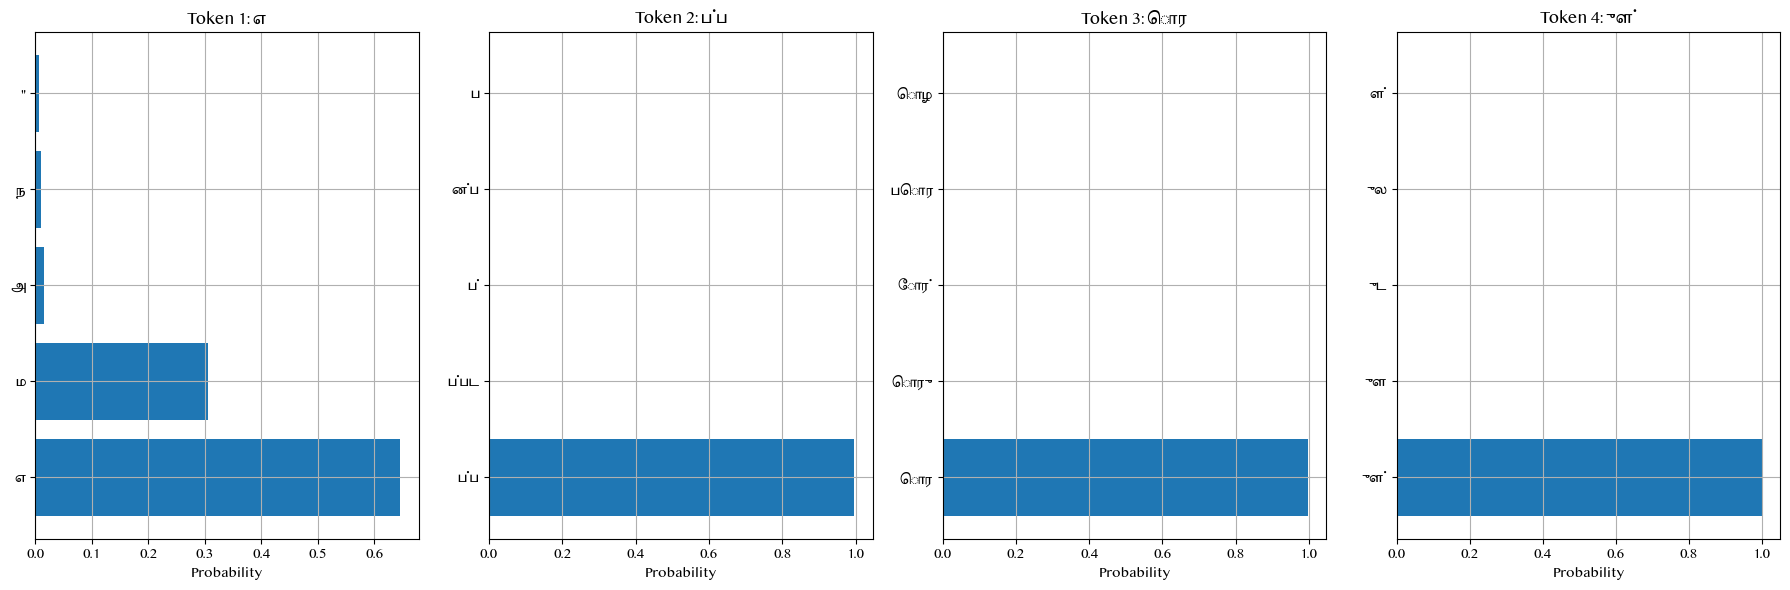

In [139]:
plt.rcParams['font.family'] = 'Tamil MN'

# Ensure minus signs are rendered properly
plt.rcParams['axes.unicode_minus'] = False

fig, axes = plt.subplots(1, 4, figsize=(18, 6)) 

for i, (token_logprobs, ax) in enumerate(zip(
    completion3.choices[0].logprobs.content[:5],
    axes
)):
    ax.barh(
        [item.token for item in token_logprobs.top_logprobs],
        [math.exp(item.logprob) for item in token_logprobs.top_logprobs]
    )
    ax.set_xlabel('Probability')
    ax.set_title(f'Token {i+1}: {token_logprobs.token}')
                  
    probabilities = [math.exp(item.logprob) for item in token_logprobs.top_logprobs]
    ax.grid(True)

plt.tight_layout()
plt.show()